In [1]:
'''Use KNearestNeighbourRegressor to Predict Price of House.

Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt '''



#Use pandas to get some insights into the data (10 marks)
#Show some interesting visualization of the data (10 marks)
#Manage data for training & testing (20)
#Finding a better value of k (10)

'Use KNearestNeighbourRegressor to Predict Price of House.\n\nHere is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt '

#Use pandas to get some insights into the data (10 marks)


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
df.info()

#There are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [13]:
df.describe()


#These are few statistical insights of our dataset and there are no categorical data in our dataset

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [14]:
df.corr().loc['Price' , :] 


#Un named column is useless
#sqft, Bathroom,  Bedroom columns have good co relation with Price as a target variable
#Floor, TotalFloor, Living.Room has quite less co relation column has 

Unnamed: 0    -0.077512
Sqft           0.825514
Floor          0.244553
TotalFloor     0.333631
Bedroom        0.467059
Living.Room    0.328788
Bathroom       0.605542
Price          1.000000
Name: Price, dtype: float64

In [36]:
df.drop_duplicates()


#The size is 645 again so there are no duplicates

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


#Show some interesting visualization of the data (10 marks)

In [15]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [17]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


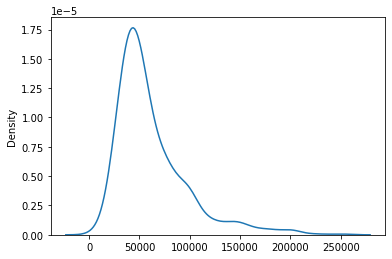

In [23]:
sns.distplot( x= df['Price'], hist =False)


#The data has some outliers since it is not standard normal distribution 
#So we will take care of outliers after some visualization

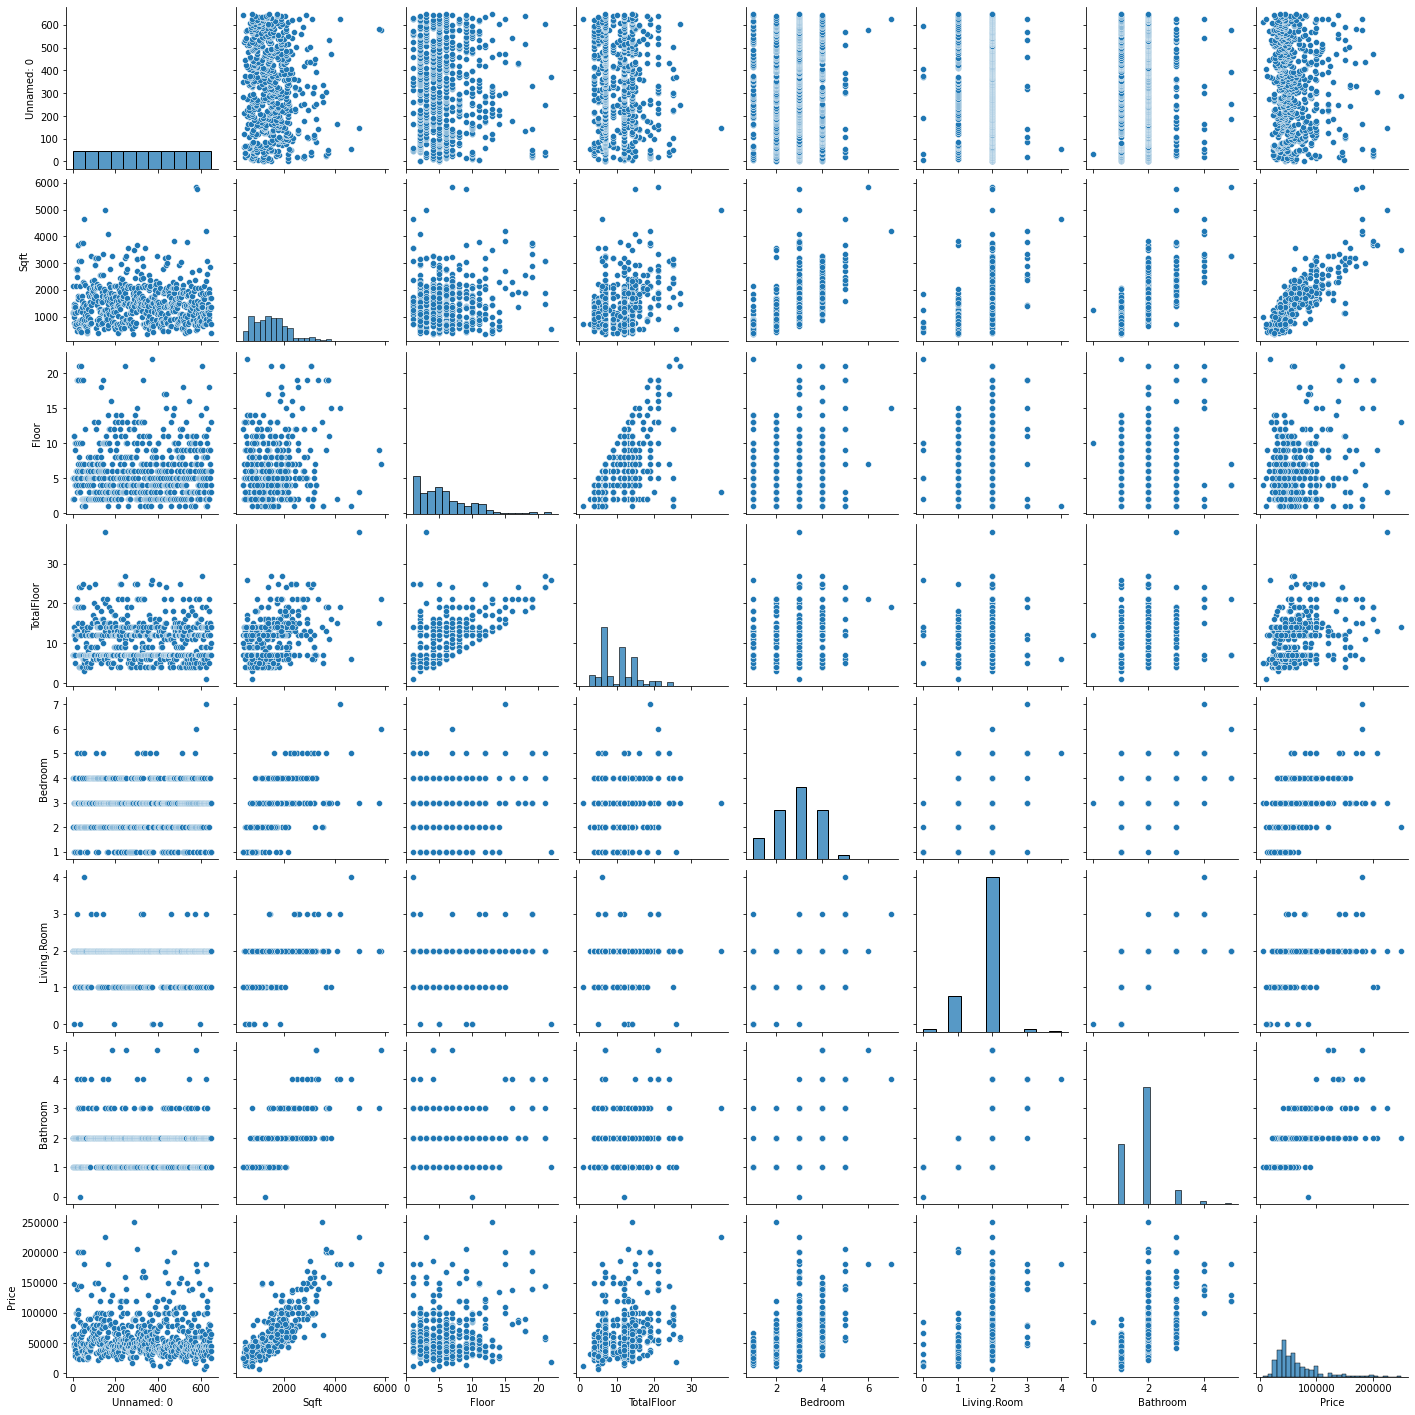

In [24]:
sns.pairplot(data = df)


# This is summary of all plots of all categories with respect to each other

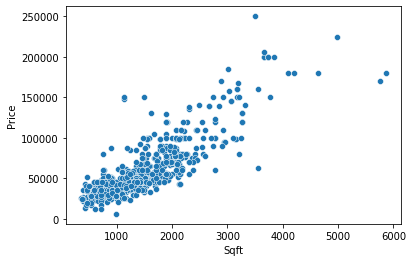

In [26]:
sns.scatterplot(data= df, x= 'Sqft', y= 'Price')


#Sqft has good linear relation ship with target variable price

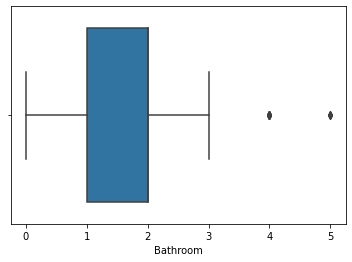

In [32]:
sns.boxplot(data= df, x= 'Bathroom')


#our data set has 4, 5 bathrooms as outliers so we need not to use them

In [47]:
df = df.loc[df['Bathroom'] <= 3]
df


#Thus records with 4,5 Bathrooms as outliers are deleted

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


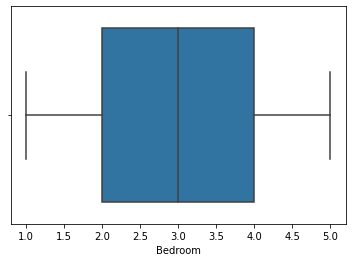

In [51]:
sns.boxplot(data= df, x= 'Bedroom')


#There are no outliers in Bedroom data

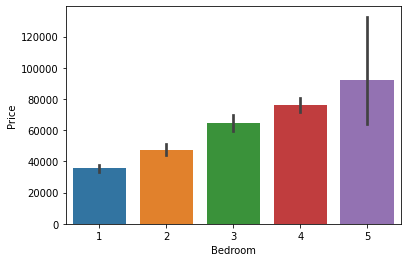

In [53]:
sns.barplot(data = df, x= 'Bedroom', y='Price')


#It is clear that Price is high with more number of Beddrooms in a house

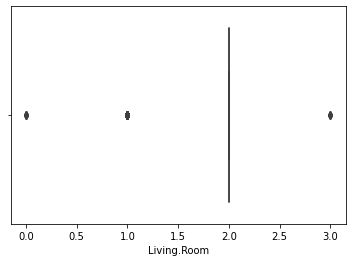

In [59]:
sns.boxplot(data= df, x= 'Living.Room')


#Living.Room column is not very insightful

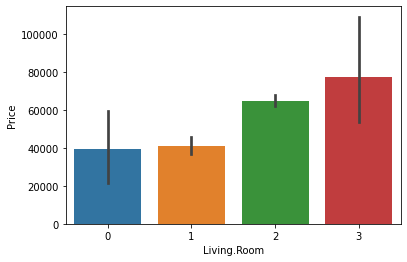

In [58]:
sns.barplot(data = df, x= 'Living.Room', y='Price')


#There is a week insigh that the price is more with more living rooms

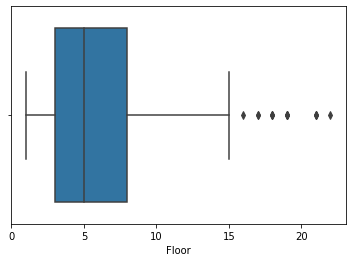

In [61]:
sns.boxplot(data= df, x= 'Floor')


#There are outliers above 15 floors
#we can delete those records as per our convenience because there are chances for a house to have more than 15 floors


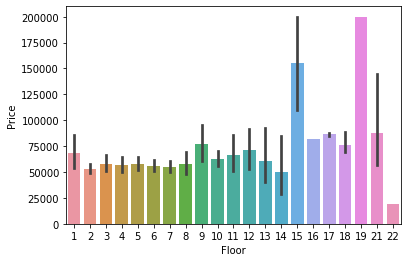

In [62]:
sns.barplot(data = df, x= 'Floor', y='Price')


#There are fluctuations in price after 15 floors so they might be the outliers so we can temove them now

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


#Manage data for training & testing (20)

In [72]:
#Let us define the explanatory variable 'X' and Target variable 'Y' for our ML model
X= df.drop('Price', axis=1)
y= df.Price

In [73]:
X.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1,1177.698,2,7,2,2,2
1,2,2134.800,5,7,4,2,2
2,3,1138.560,5,7,2,2,1
3,4,1458.780,2,7,3,2,2
4,5,967.776,11,14,3,2,2


In [74]:
y.head()

0    62000
1    78000
2    58000
3    45000
4    45000
Name: Price, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [84]:
#Standard normal scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [85]:
x_train.head()

,0,1,2,3,4,5,6
0,0.508954,-0.951891,0.758905,0.320378,-0.834445,-1.908082,-1.368006
1,0.771198,0.823031,-0.512599,0.753109,1.248498,0.420345,0.425683
2,-1.385627,-0.449167,-1.148352,-0.328717,0.207027,0.420345,0.425683
3,-1.589000,0.407515,1.394657,0.320378,1.248498,0.420345,0.425683
4,-0.095814,0.294658,2.348286,2.267665,-0.834445,0.420345,0.425683


In [86]:
y_train.head()

414     35000
463    100000
63      49000
25      98000
301     55000
Name: Price, dtype: int64

#Finding a better value of k (10)

In [81]:
!pip install sklearn

In [89]:
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
#To find best K value using root mean square error


rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

    
#Thus we have rmse list data from which we can plot our elbow function graph alco we can print error for all 20 obserrvations

RMSE value for k=  1 is: 21663.534273282312
RMSE value for k=  2 is: 18144.61839437301
RMSE value for k=  3 is: 18096.25996682017
RMSE value for k=  4 is: 17211.476684842677
RMSE value for k=  5 is: 16822.54461788243
RMSE value for k=  6 is: 17361.711442459975
RMSE value for k=  7 is: 17209.86018560191
RMSE value for k=  8 is: 17329.658627466706
RMSE value for k=  9 is: 17683.420806170518
RMSE value for k=  10 is: 17387.412010210795
RMSE value for k=  11 is: 17348.339474057208
RMSE value for k=  12 is: 17199.02398702109
RMSE value for k=  13 is: 17184.092696723936
RMSE value for k=  14 is: 17245.050232345777
RMSE value for k=  15 is: 17102.314775447638
RMSE value for k=  16 is: 17277.50230025327
RMSE value for k=  17 is: 17218.049601770945
RMSE value for k=  18 is: 17425.83221202179
RMSE value for k=  19 is: 17337.462853053028
RMSE value for k=  20 is: 17386.678462611482


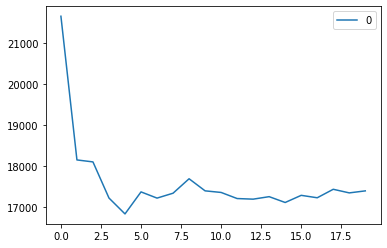

In [91]:
#plotting the rmse values against k values also known as elbow function

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


#therefore K= 5 has lease error and thus it will have more accuracy

In [93]:
#finally lets check our model accuracy   !
from sklearn.metrics import accuracy_score

In [111]:
my_model = KNeighborsRegressor(n_neighbors = 5)

my_model.fit(x_train, y_train)  #fit the model

pred=model.predict(x_test) #make prediction on test set
predictions= pd.DataFrame(pred)

In [112]:
accuracy_score(y_test, predictions)

ValueError: ignored